In [3]:
import pandas as pd 

df = pd.read_csv('D:/project_data_mining/src/dataset.csv')

In [4]:
# 1. Thống kê mô tả
descriptive_stats = df['CPI'].describe()
stats_GDP = df['GDP'].describe()

# 2. Kiểm tra độ lệch và độ nhọn
skewness = df['CPI'].skew()
kurtosis = df['CPI'].kurt()

# Hiển thị kết quả
results = {
    " CPI": descriptive_stats,
    "Skewness": skewness,
    "Kurtosis": kurtosis,
    "GDP": stats_GDP,
}

results = pd.DataFrame(results)

results


,CPI,Skewness,Kurtosis,GDP
count,2136.000000,-0.398619,-0.888781,2136.000000
mean,90.313705,-0.398619,-0.888781,465.268101
std,9.046060,-0.398619,-0.888781,63.364384
min,67.101000,-0.398619,-0.888781,361.418000
25%,84.049750,-0.398619,-0.888781,411.203000
50%,91.371500,-0.398619,-0.888781,462.685000
75%,98.665500,-0.398619,-0.888781,528.690000
max,106.677000,-0.398619,-0.888781,574.453000


In [5]:
# Thống kê mô tả (Expenditure_category)
stats_Expenditure_category = df['Expenditure_category'].describe()
results = {
    " Expenditure_category": stats_Expenditure_category,
}

results = pd.DataFrame(results)

results

,Expenditure_category
count,2136
unique,12
top,All Items
freq,178


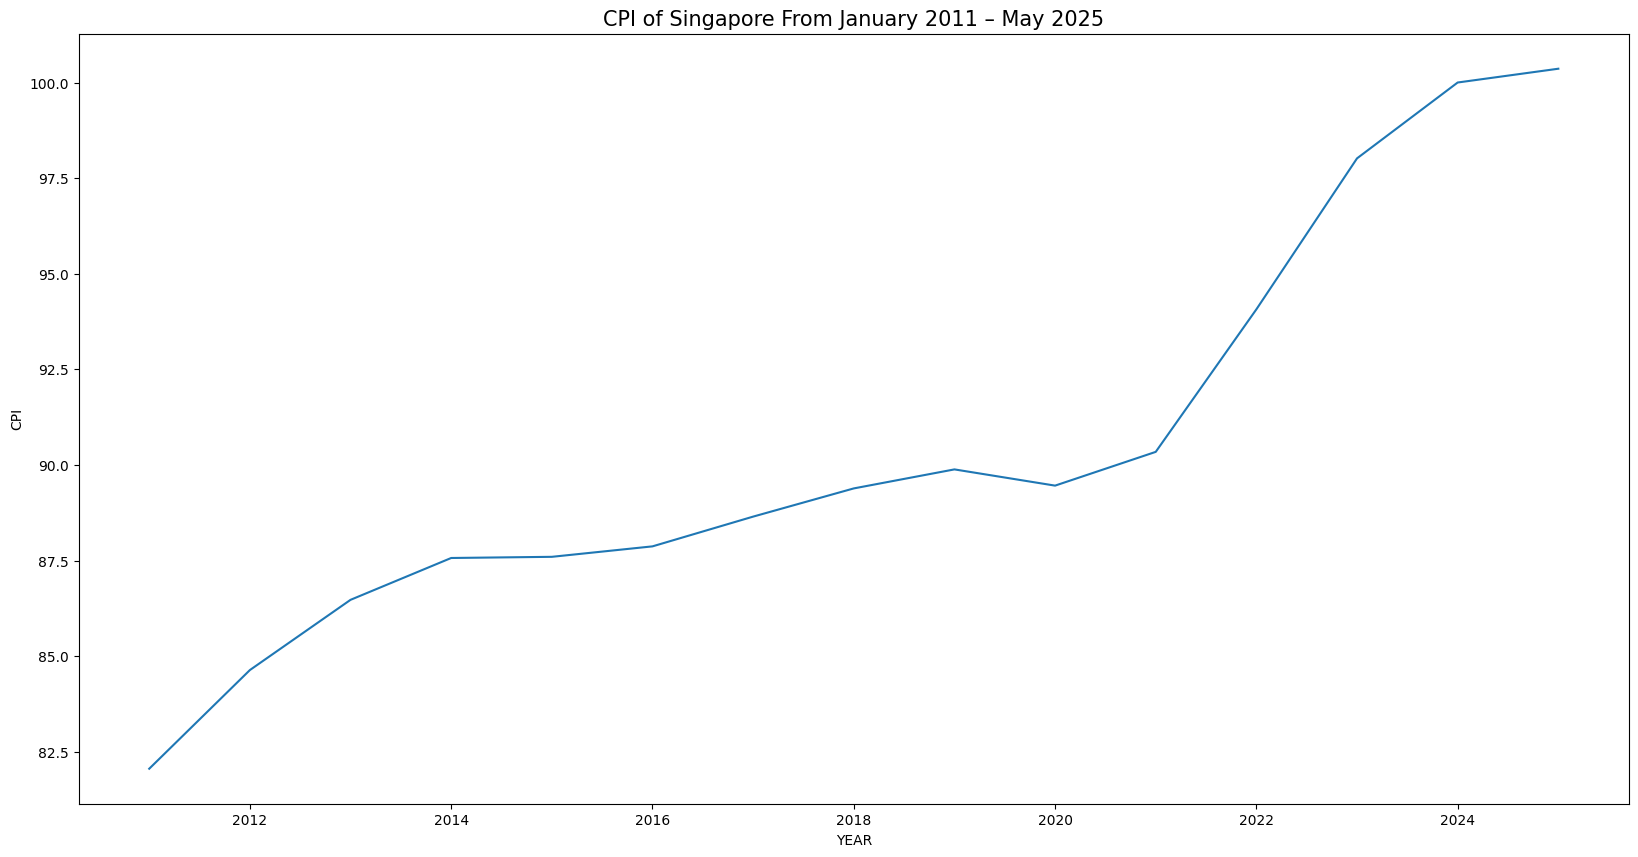

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.lineplot(x='YEAR',y='CPI',data=df,ax=ax, errorbar=None )

ax.set_ylabel('CPI')
ax.set_title('CPI of Singapore From January 2011 – May 2025', fontsize=15)
plt.show()

In [7]:
# log- transform 
# import numpy as np 

# df['cpi_log'] = np.log1p(df['CPI'])


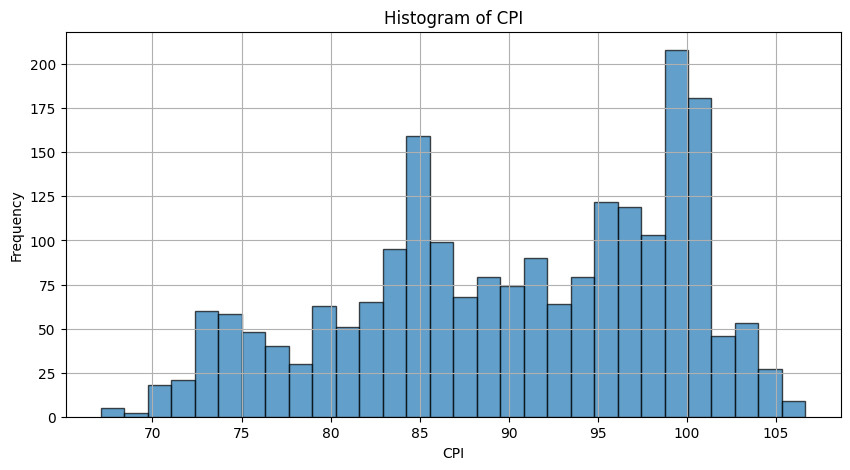

In [8]:

# 2. Histogram (Phân phối dữ liệu)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['CPI'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

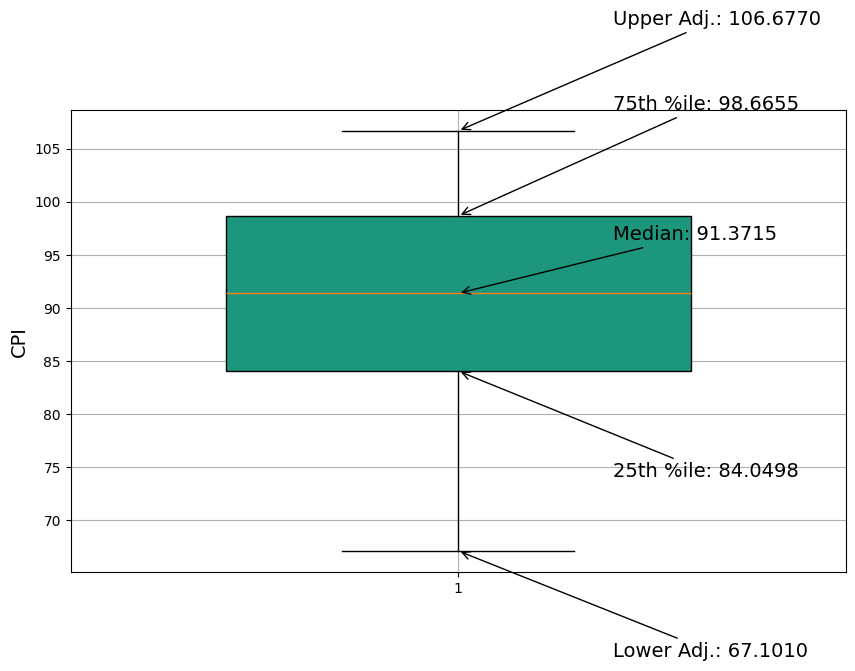

In [9]:
import numpy as np

dff = df['CPI'].dropna()  # Ensure no NaN values
median = np.median(dff)
q1 = np.percentile(dff, 25)
q3 = np.percentile(dff, 75)
iqr = q3 - q1
lower_adj = max(min(dff), q1 - 1.5 * iqr)
upper_adj = min(max(dff), q3 + 1.5 * iqr)

# Now, the plotting code will work
plt.figure(figsize=(10, 6))

# Plot the boxplot
box = plt.boxplot(dff, patch_artist=True, widths=0.6, showmeans=False)
plt.ylabel('CPI', fontsize=14)

# Style boxplot with orange color
for patch in box['boxes']:
    patch.set_facecolor('#1d967e')

# Adding annotations with larger font size
plt.annotate(f"Median: {median:.4f}", xy=(1, median), xytext=(1.2, median + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='left')
plt.annotate(f"25th %ile: {q1:.4f}", xy=(1, q1), xytext=(1.2, q1 - 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='left')
plt.annotate(f"75th %ile: {q3:.4f}", xy=(1, q3), xytext=(1.2, q3 + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='left')
plt.annotate(f"Lower Adj.: {lower_adj:.4f}", xy=(1, lower_adj), xytext=(1.2, lower_adj - 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='left')
plt.annotate(f"Upper Adj.: {upper_adj:.4f}", xy=(1, upper_adj), xytext=(1.2, upper_adj + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='left')

# Remove grid
plt.grid(True)
plt.show()

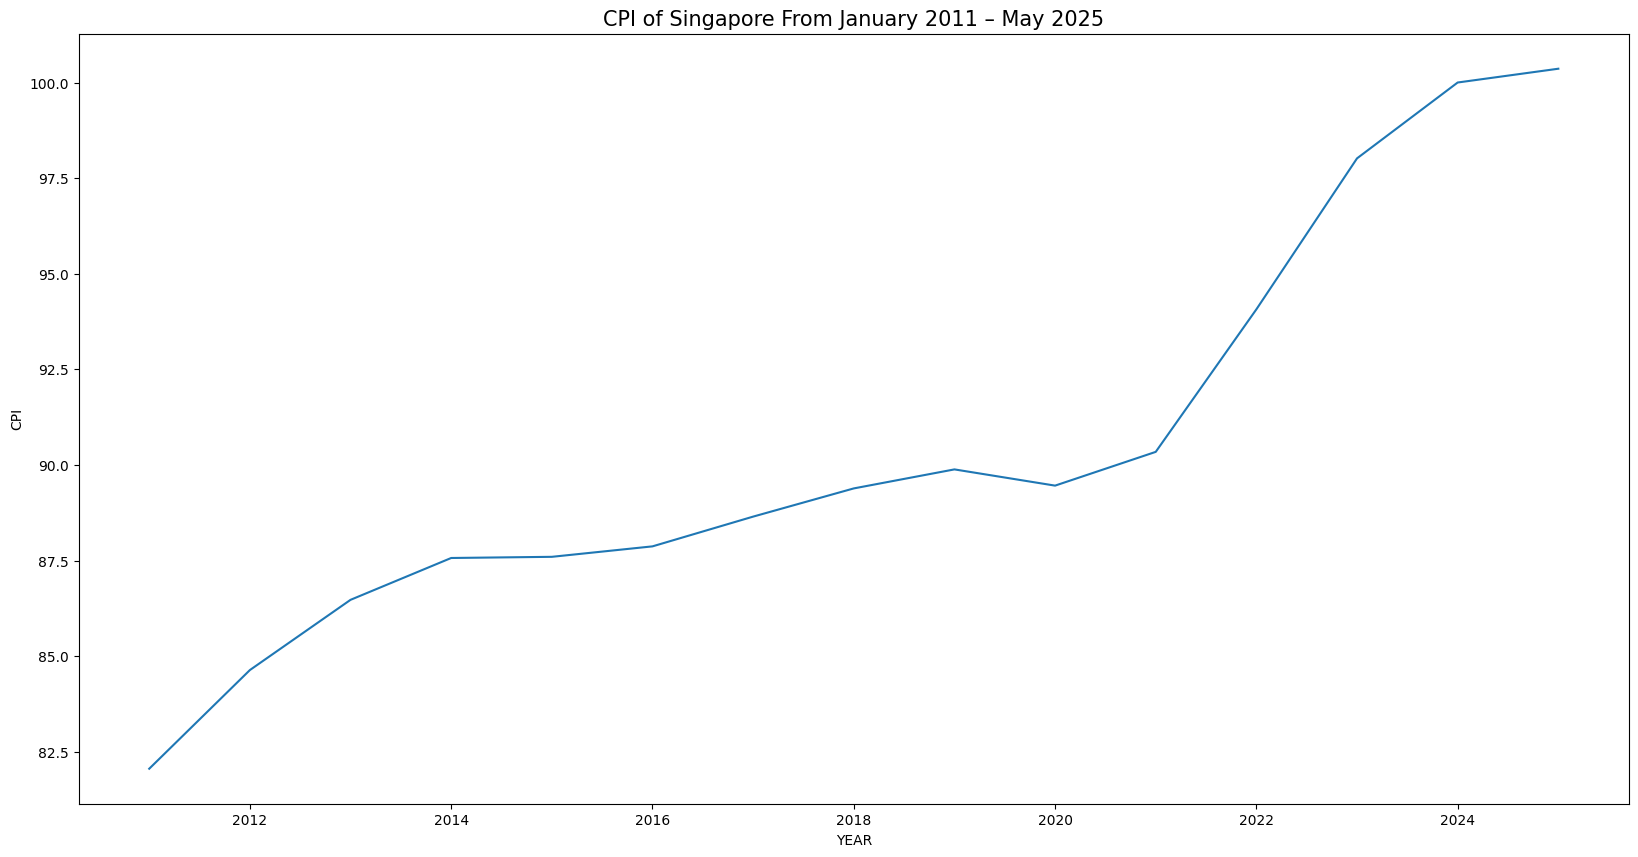

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.lineplot(x='YEAR',y='CPI',data=df,ax=ax, errorbar=None )

ax.set_ylabel('CPI')
ax.set_title('CPI of Singapore From January 2011 – May 2025', fontsize=15)
plt.show()

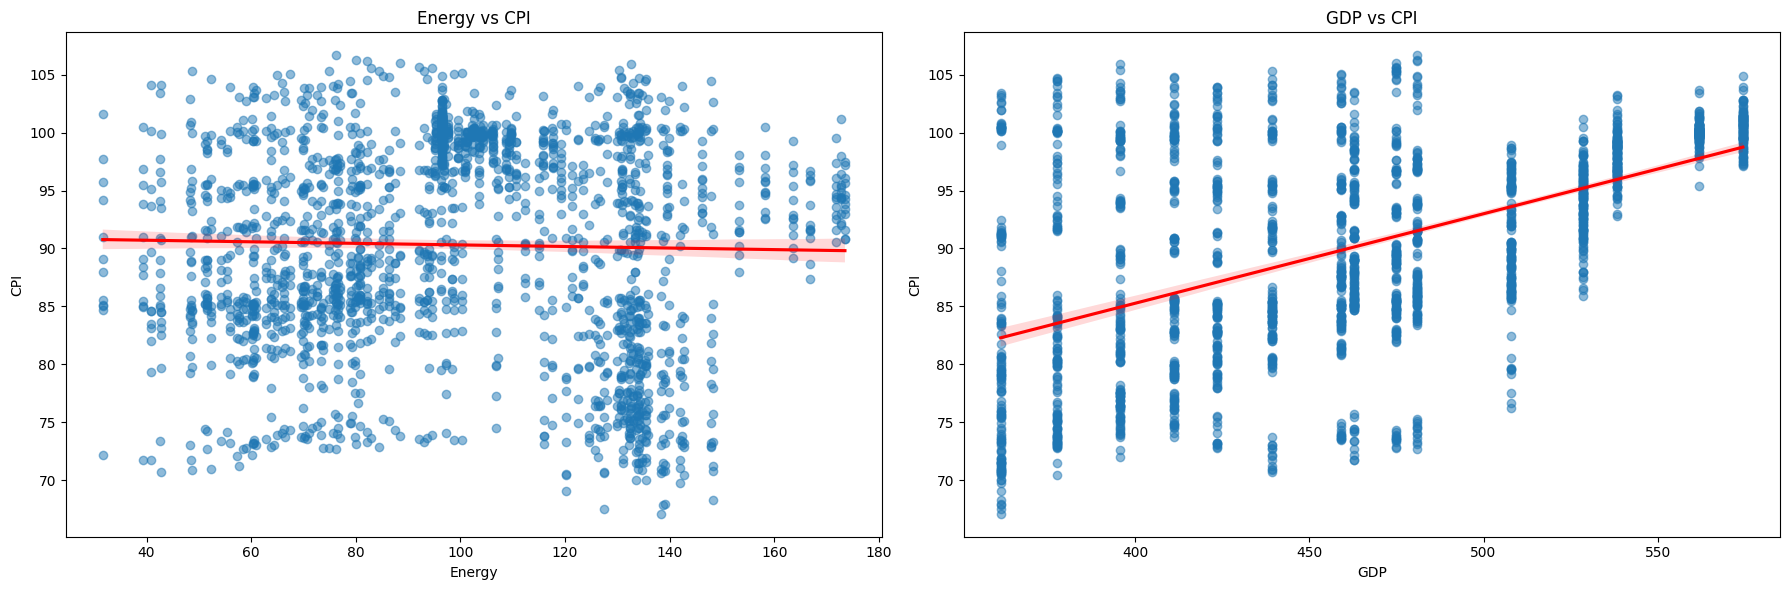

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Energy vs CPI
sns.regplot(x='Energy',y='CPI',data=df,ax=axes[0],
            scatter_kws={'alpha':0.5},line_kws={'color':'red'})
axes[0].set_title('Energy vs CPI')

# GDP vs CPI
sns.regplot(x='GDP',y='CPI',data=df,ax=axes[1], 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('GDP vs CPI')

plt.tight_layout()

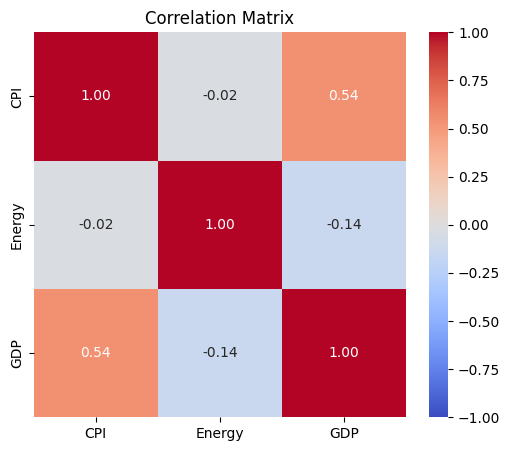

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = ['CPI', 'Energy', 'GDP']
corr = df[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap( corr,annot=True,fmt='.2f',cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [13]:
df.isna().sum()

Expenditure_category    0
TIME_PERIOD             0
CPI                     0
Energy                  0
YEAR                    0
GDP                     0
dtype: int64

In [14]:
#  Missing real-time
# -------------------------------------------------------
def clean_missing(df):
    df = df.sort_values("TIME_PERIOD")


    # 1. Drop CPI NaN
    df = df.dropna(subset=["CPI"])

    # 2. Interpolate Energy 
    df["Energy"] = df["Energy"].interpolate(
        method="linear",
        limit_direction="both"
    )
    return df


In [15]:
df_clean = []

for cat in df["Expenditure_category"].unique():
    df_cat = df[df["Expenditure_category"] == cat].copy()
    df_cat = clean_missing(df_cat)
    df_clean.append(df_cat)

df = pd.concat(df_clean).reset_index(drop=True)


In [16]:
df.shape

(2136, 6)

In [17]:
df.isna().sum()



Expenditure_category    0
TIME_PERIOD             0
CPI                     0
Energy                  0
YEAR                    0
GDP                     0
dtype: int64

In [18]:
df.dtypes

Expenditure_category     object
TIME_PERIOD              object
CPI                     float64
Energy                  float64
YEAR                      int64
GDP                     float64
dtype: object

In [19]:
# to datetime
df["TIME_PERIOD"] = pd.to_datetime(df["TIME_PERIOD"])
df = df.sort_values(["Expenditure_category", "TIME_PERIOD"])

In [20]:
# save CSV file
df.to_csv("dataset.csv", index=False)